# Machine Learning with scikit-learn

## What Is Machine Learning?

> **"If you torture the data enough, nature will always confess."** –Ronald Coase

As a one line version—not entirely original—I like to think of machine learning as "statistics on steroids."  That characterization may be more cute than is necessary, but it is a good start.  Others have used phrases like "extracting knowledge from raw data by computational means."

The lede on the Wikipedia article provides a bit more.

![Wikipedia entry](img/ML-Wikipedia.png)

Cite: [Wikipedia, 09:29, 2018 October 4](https://en.wikipedia.org/w/index.php?title=Machine_learning&oldid=862453222)

## Machine Learning Libraries

There are many software libraries available for machine learning.  A synopses of some of the main ones is in a supporting notebook:

<a href="OtherLibraries.ipynb">Other libraries: <img src="img/open-notebook.png" align="right"/></a>

## What Is scikit-learn?

Scikit-learn provides a large range of algorithms in machine learning that are unified under a common and intuitive API. Most of the dozens of classes provided for various kinds of models share the large majority of the same calling interface. Very often—as we will see in examples below—you can easily substitute one algorithm for another with nearly no change in your underlying code. This allows you to explore the problem space quickly, and often arrive at an optimal, or at least satisficing$^1$ approach to your problem domain or datasets.

* Simple and efficient tools for data mining and data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib
* Open source, commercially usable - BSD license

<hr/>

<small>$^1$<i>Satisficing is a decision-making strategy of searching through the alternatives until an acceptability threshold is met. It is a portmanteau of satisfy and suffice, and was introduced by Herbert A. Simon in 1956. He maintained that many natural problems are characterized by computational intractability or a lack of information, both of which preclude the use of mathematical optimization procedures.</i></small>

## Overview of Techniques Used in Machine Learning

The diagram below is from the scikit-learn documentation, but the same general schematic of different techniques and algorithms that it outlines applies equally to any other library.  The classes represented in bubbles mostly will have equivalent versions in other libraries.

![Scikit-learn topic areas](img/sklearn-topics.png)

## Difference between "Deep Learning" and other ML Techniques

### Neural Networks

The basic idea of a "multilayer perceptron" is a "feed-forward" artificial neural network, composed of "neurons" arranged in "layers." A common illustration is similar to that at right. This idea of "Hebbian networks" has existed since the 1940s, but it really only became a machine learning technique with Paul Werbos' 1975 introduction of "backpropagation" as a means to train such networks. Either way, the ideas are fairly old.

![Basic perceptron](img/basic-perceptron.png)

Included in diagram is a network with 4 layers and 12 connections (i.e. "parameters"). If it were "fully connected" the diagram would have 16 parameters. What makes a particular trained network special is the set of "weights" in the connections, illustrated and commonly named as subscripted  $w$ values.

For many decades after neural networks were known, they remained a minor area of interest. Usually a variety of other techniques rooted in statistics and linear algebra were more effective in solving problems of classification, regression, and clustering.

Image credit: [Feedforward Neural Networks", John McGonagle and yushi 21](https://brilliant.org/wiki/feedforward-neural-networks/)

### What if We Had a LOT More Neurons?

In the last decade or less, neural networks—mathematically not much different from those described in the 1940s—grew much larger. For example, the extremely power Inception v3 image classifier consists of approximately 23.8 million parameters across about 140 layers. Layers generally each have many more neurons than the dozen or fewer shown in textbook illustrations like the one above. Scikit-learn has basic neural network techniques, but their use is mostly for the uses that made sense more than five years ago.

![Inception v3](img/inception-v3.png)

Classic "fully connected" layers make up only a small number of those used. More than anything else, the effect and reason for this is to limit the combinatorial explosion of connections, limiting the parameters to only 24 million.

Image credit: [Advanced Guide to Inception v3 on Cloud TPU" (Google)](https://cloud.google.com/tpu/docs/inception-v3-advanced)

## Classification versus Regression versus Clustering

### Classification

Classification is a type of supervised learning in which the targets for a prediction are a set of categorical values.

### Regression

Regression is a type of supervised learning in which the targets for a prediction are quantitative or continuous values.

### Clustering

Clustering is a type of unsupervised learning where you want to identify similarities among collections of items without an *a prior* classification scheme. You may or may not have an *a priori* about the number of categories.

## Overfitting and Underfitting

In machine learning models, we have to worry about twin concerns.  On the one hand, we might **overfit** our model to the dataset we have available.  If we train a model extremely accurately against the data itself, metrics we use for the quality of the model will probably show high values.  However, in this scenario, the model is unlikely to extend well to novel data, which is usually the entire point of developing a model and making predictions.  By training in a fine tuned way against one dataset, we might have done nothing more than memorize that collection of values; or at least memorize a spurious pattern that exists in that particular sample data collection.

To some extent (but not completely), overfitting is mitigated by larger dataset sizes.

In contrast, if we choose a model that simply does not have the degree of detail necessary to represent the underlying real-world phenomenon, we get an **underfit** model.  In this scenario, we *smooth too much* in our simplification of the data into a model.

Some illustrations are useful.

In [1]:
from src.over_under_fit import doc, show

In [2]:
doc()

Slightly modified from:
http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

This example demonstrates the problems of underfitting and overfitting and how we can use 
linear regression with polynomial features to approximate nonlinear functions. The plot 
shows the function that we want to approximate, which is a part of the cosine function. 
In addition, the samples from the real function and the approximations of different models 
are displayed. The models have polynomial features of different degrees. We can see that 
a linear function (polynomial with degree 1) is not sufficient to fit the training samples. 
This is called underfitting. A polynomial of degree 4 approximates the true function almost 
perfectly. However, for higher degrees the model will overfit the training data, i.e. it 
learns

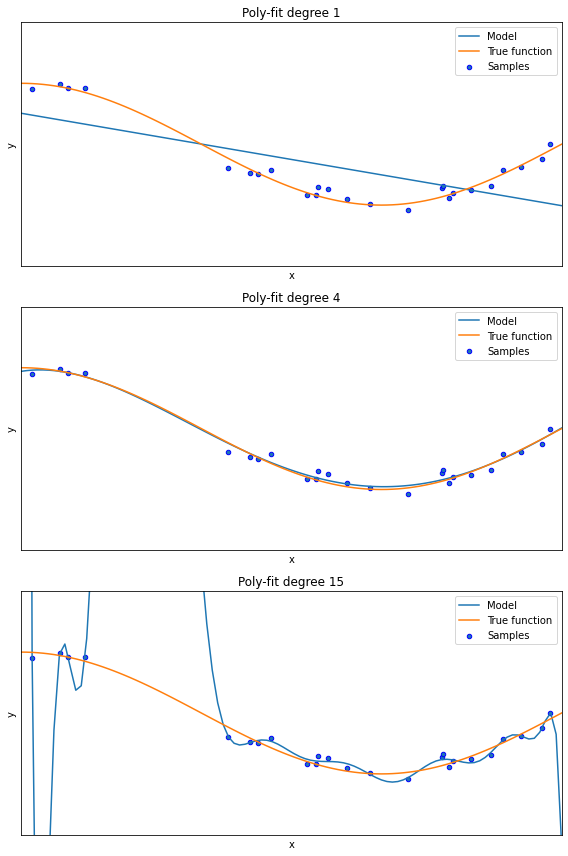

In [3]:
show()

$y = a_1x^5 + a_2x^4 + a_3x^3 + a_4x^2 + a_5x + a_6$

The above example is for a regression, but the same concept applies to categorization or clustering problems.  For example:

In [4]:
from src.over_under_fit import cluster

First let's look at a collection of points about which we have no *a priori* of their clustering.

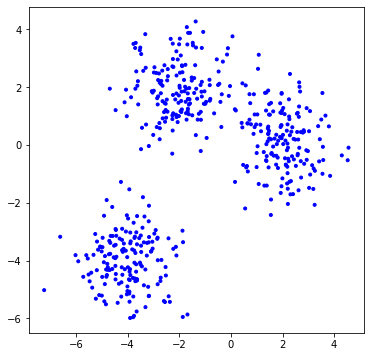

In [5]:
# "Cluster" everything into just one category
cluster(1)

To the human eye, it would seem reasonable to guess that this represents three categories of observations. Therefore, we can reasonable say that this data is **underfit** by our clustering model.  Indeed, that would also be true if we guessed there were two clusters.

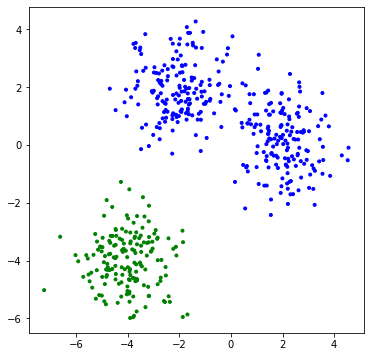

In [6]:
# Guess there might be two categories
cluster(2)

This model is not terrible, and it indeed seems to identify an important difference in the data.  But looking at the base-line known values for the categories, we can see it really is three types:

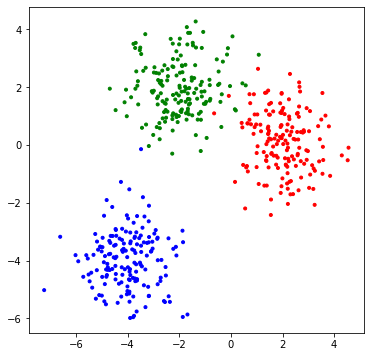

In [7]:
# Show the "known true" categories
cluster(1, known=True)

If we cluster into three categories algorithmically, we almost (but not quite) recover the underlying truth.  The algorithms puts the categories in arbitrary order, so the colors are rotated; but you can seem that most-but-not-all the points are in the same clusters.

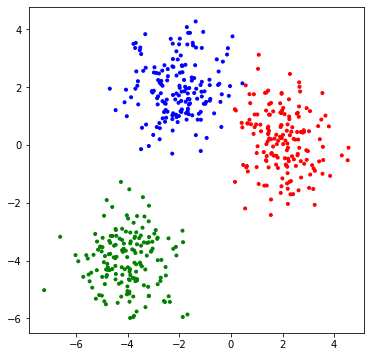

In [8]:
cluster(3)

Moving farther along, if we guessed *more* clusters we would start to **overfit** the data, and impute category distinctions that do not exist in the underlying dataset.  In this case we known the true number because we have specifically generated it as such. In real-world data we usually do not know this in advance, so we can only tell by performing various validations on the strength of the fit.

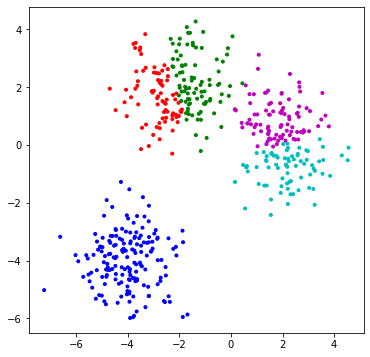

In [9]:
# Guess there might be 5 categories
cluster(5)

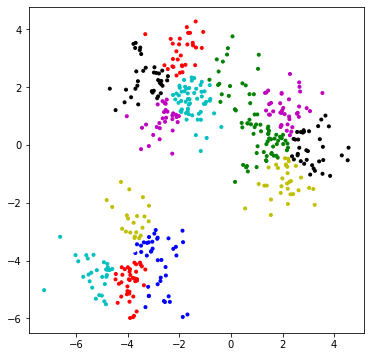

In [10]:
# Guess there might be 15 categories
cluster(15)

## Dimensionality Reduction

Dimensionality reduction is most often a technique used to assist with other techniques. By reducing a large number of features to relatively few features; very often other techniques are more successful relative to these transformed synthetic features. Sometimes the dimensionality reduction itself is sufficient to identify the "main gist" of your data.

## Feature Engineering

Very often, the "features" we are given in our original data are not those that will prove most useful in our final analysis. It is often necessary to identify "the data inside the data." Sometimes feature engineering can be as simple as normalizing the distribution of values. Other times it can involve creating synthetic features out of two or more raw features.

## Feature Selection

Often, the features you have in your raw data contain some features with little to no predictive or analytic value. Identifying and excluding irrelevant features often improves the quality of a model.

## Categorical versus Ordinal versus Continuous Variables

Features come in one of three (or four) basic types.

### Categorical variables 

Some are **categorical** (also called nominal): A discrete set of values that a feature may assume, often named by words or codes (but sometimes confusingly as integers where an order may be misleadingly implied).

### Ordinal variables

Some are **ordinal**: There is a scale from low to high in the data values, but the spacing in the data may have little to no relationship to the underlying phenomenon. For example, suppose you have data from a foot race that records the first place, second place, etc. winners, but not the times taken by each.  1st place crossed the line before 2nd place; but we have no information on whether it was milliseconds sooner or hours sooner.  Likewise between 2nd and 3rd position.

### Continuous variables

Some are **continuous** or quantitative: Some quantity is actually measured such that a number represents the amount of it. The distribution of these measurements is likely not to be uniform and linear (in which case scaling might be relevant), but there is a real thing being measured. Measurements might be quantized for continuous variables, but that does not necessarily make them ordinal instead. For example, we might measure annual rainfall in each town only to the nearest inch, and hence have integers for that feature.

### Think black

The acronym NOIR is sometimes used as a mnemonic for different feature types.  This is the French word for "black" but is especially associated, in English, with a style of "dark" literature or film.  The acronym stands for Nominal / Ordinal / Interval / Ratio.

The last two of these divide continuous variables into interval vs. ratio, which is useful.  The issue here is whether there is a "natural zero" in the data.  The domain zero need not always be numeric zero, but most commonly it is, or the data should be normalized in such a way to make it so.

Acidity or alkalinity measured on pH scale has a natural zero of 7, and generally values between 0 and 14 (although those are not sharp physical limits).  If we used pH measure as a feature, we might re-center to numeric zero to express actual ratios (albeit, log ratios for this measure).

As an example of an interval that is not a ratio, I read an *absolutely terrible* newspaper article that claimed that the temperature on a certain winter day, in some city, was **twice** as hot as in average years.  This was based on an artifact of the Fahrenheit scale where there was a difference between 25℉ and 50℉.  This is nonsense as a ratio, of course.  It is perfectly useful to talk about the *mean temperature* or the *standard deviation* in temperature, but the numeric ratio is pointless.  

Moreover, in this case, using Kelvin (or Rankine) does not really address the issue.  Yes, in terms of actual energy value, 100K is twice as much at 50K, but the range of temperatures in human-occupied parts of the surface of the earth have no clear "natural zero" and cover a fairly arbitrary numeric range well above absolute zero.

In contrast, the *ratio variable* of rainfall has a natural zero which is also numeric zero.  Zero inches (or centimeters) of rain means there was none.  2 inches of rain is twice as much water falling as 1 inch of rain is.

This notion of types of variables applies to statistics broadly. Some other concepts are genuinely specific to machine learning.  

## One-hot Encoding

For many machine learning algorithms, including neural networks, it is more useful to have a categorical feature with N possible values encoded as N features, each taking a binary value. Several tools, including a couple functions in scikit-learn will transform raw datasets into this format. Obviously, by encoding this way, dimensionality is increased.

Let us illustrate using a toy test dataset.  The following whimsical data is suggested in a blog post by [Håkon Hapnes Strand](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science).  Imagine we collected some data on individual organisms—namely taxonomic class, height, and lifespan.  Depending on our purpose, we might use this data for either supervised or unsupervised learning techniques (if we had a lot more observations, and a number more features).

In [11]:
data= [
    ['human', 1.7, 85],
    ['alien', 1.8, 92],
    ['penguin', 1.2, 37],
    ['octopus', 2.3, 25],
    ['alien', 1.7, 85],
    ['human', 1.2, 37],
    ['octopus', 0.4, 8],
    ['human', 2.0, 97]
]

In [12]:
# The data with its original feature, just as a DataFrame
import pandas as pd
naive = pd.DataFrame(data, columns=['species', 'height (M)', 'lifespan (years)'])
naive

,species,height (M),lifespan (years)
0,human,1.7,85
1,alien,1.8,92
2,penguin,1.2,37
3,octopus,2.3,25
4,alien,1.7,85
5,human,1.2,37
6,octopus,0.4,8
7,human,2.0,97


In [13]:
# The data one-hot encoded
encoded = pd.get_dummies(naive)
encoded.columns = [c.replace('species_','') for c in encoded.columns]
encoded

,height (M),lifespan (years),alien,human,octopus,penguin
0,1.7,85,0,1,0,0
1,1.8,92,1,0,0,0
2,1.2,37,0,0,0,1
3,2.3,25,0,0,1,0
4,1.7,85,1,0,0,0
5,1.2,37,0,1,0,0
6,0.4,8,0,0,1,0
7,2.0,97,0,1,0,0


## Hyperparameters

The notion of parameters was introduced to define the way in which a model was trained. For neural networks, parameters are the weights of all the connections between the neurons. But in other models a similar parameterization exists. For example, in a basic linear regression, the coefficients in each dimension are parameters of the trained/fitted model.

However, many algorithms used in machine learning take "hyperparameters" that tune how the training itself occurs. These may be cut-off values where a "good enough" estimate is obtained, for example. Or there may be hidden terms in an underlying equation that can be set. Or an algorithm may actually be a family of closely related algorithms, and a hyperparameter chooses among them. Models in scikit-learn typically have a number of hyperparameters to set before they are trained (with "sensible" defaults when you do not specify).

## Grid Search

While scikit-learn usually provides "sensible" defaults for hyperparameters, there is often a great deal of domain and dataset specificity for which hyperparameters are most effective. An API is provided to search across the combinatorial space of hyperparameter values and evaluate each collection.

## Metrics

After you have trained a model, the big question is "how good" is the model.  There is a lot of nuance to answering that question, and correspondingly a large number of measures and techniques.

One common technique to look at a combination of successes and failure in a machine learning model is a *confusion matrix*.  Let us look at an example, picking up the whimsical data used above.  Suppose we wanted to guess the taxonomic class of an observed organism and our model had these results:

| Predict/Actual | Human    | Octopus  | Penguin  |
|----------------|----------|----------|----------|
| Human          |  **5**   |    0     |    2     |
| Octopus        |    3     |  **3**   |    3     |
| Penguin        |    0     |    1     |  **11**  |

Giving a single number to describe *how good* the model is is not immediately obvious.  The model is very good at predicting penguins, but it gets rather bad when it predicts octopi.  In fact, if the model predicts something is an octopus, it probably isn't (only 1/3rd of such predictions are accurate).

### Accuracy versus Precision versus Recall

Naïvely, we might simply ask about the "accuracy" of a model (at least for classification tasks).  This is simply the number of *right* answers divided by the number of data points.  In our example, we have 28 observations of organisms, and 19 were classified accurately, so that's a **68%** accuracy.  Again though, the accuracy varies quite a lot if we restrict it to just one class of the predictions.  For our multi-class labels, this may not be a bad measure.  

Consider a binary problem though:

| Predict/Actual | Positive | Negative |
|----------------|----------|----------|
| Positive       |    1     |    0     |
| Negative       |    2     |   997    | 

Calculating *accuracy*, we find that this model is **99.8%** accurate! That seems pretty good until you think of this test as a medical screening for a fatal disease.  *Two thirds of the people who actually have the disease will be judged free of it by this model* (and hence perhaps not be treated for the condition); that isn't such a happy real-world result.

<hr/>

In contrast with accuracy, the "precision" of a model is defined as:

$$\text{Precision} = \frac{true\: positive}{true\: positive + false\: positive}$$

Generalizing that to the multi-class case, the formula is as follows (for i being the index of the class):

$$\text{Precision}_{i} = \cfrac{M_{ii}}{\sum_i M_{ij}}$$

Applying that to our hypothetical medical screening, we get a a precision of **1.0**.  We cannot do better than that.  The problem is with "recall" which is defined as:

$$\text{Recall} = \frac{true\: positive}{true\: positive + false\: negative}$$

Generalizing that to the multi-class case:

$$\text{Recall}_{i} = \cfrac{M_{ii}}{\sum_j M_{ij}}$$

Here we do much worse by having a recall of **33.3%** in our medical diagnosis case! This is obviously a terrible result if we care about recall.

### F1 Score

There are several different algorithms that attempt to *blend* precision and recall to product a single "score."  Scikit-learn provides a number of other scalar scores that are useful for differing purposes (and other libraries are similar), but F1 score is one that is used very frequently.  It is simply:

$$\text{F1} = 2 \times \cfrac{precision \times recall}{precision + recall}$$

Applying that to our medical diagnostic model, we get an F1 score of 50%.  Still not good, but we account for the high precision to some extent.  For intermediate cases, the F1 score provides good balance.

F1 score can be generalized to multi-class models by averaging the F1 score across each class, counting only correct/incorrect per class.

### Code Examples

In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_true = ["human",   "octopus", "human", "human", "octopus", "penguin", "penguin"]
y_pred = ["octopus", "octopus", "human", "human", "octopus", "human",   "penguin"]
labels = ['octopus', 'penguin', 'human']

In [15]:
cm = confusion_matrix(y_true, y_pred, labels=labels)
print("Confusion Matrix (predict/actual):\n", 
      pd.DataFrame(cm, index=labels, columns=labels), sep="")

recall = np.diag(cm) / np.sum(cm, axis=1)
print("\nRecall:\n", pd.Series(recall, index=labels), sep="")

precision = np.diag(cm) / np.sum(cm, axis=0)
print("\nPrecision:\n", pd.Series(precision, index=labels), sep="")

print("\nAccuracy:\n", np.sum(np.diag(cm)) / np.sum(cm))

Confusion Matrix (predict/actual):
         octopus  penguin  human
octopus        2        0      0
penguin        0        1      1
human          1        0      2

Recall:
octopus    1.000000
penguin    0.500000
human      0.666667
dtype: float64

Precision:
octopus    0.666667
penguin    1.000000
human      0.666667
dtype: float64

Accuracy:
 0.7142857142857143


In this particular case, F1 score is very close to accuracy.  In fact, using the "micro" averaging method reduces the result to accuracy.  Using the "macro" averaging makes it equivalent to a NumPy reduction from the formula given.

In [16]:
from sklearn.metrics import f1_score
weighted_f1 = f1_score(y_true, y_pred, average="weighted")
print("\nF1 score:\n", weighted_f1, sep="")


F1 score:
0.7047619047619048


In [17]:
print("Naive averaging F1 score:", np.mean(2*(recall*precision)/(recall+precision)))
print(" sklearn macro averaging:", f1_score(y_true, y_pred, average="macro"))

Naive averaging F1 score: 0.7111111111111111
 sklearn macro averaging: 0.7111111111111111


## Next Lesson

**Exploring a data set**: This lessson got us as far as understading some general concepts in machine learning, with an overview of most of the key ideas.  Next we will start working with a concrete dataset, clean it up and examine it, and being to use scikit-learn APIs.

<a href="Exploring.ipynb"><img src="img/open-notebook.png" align="left"/></a>